In [ ]:
One of the harder things to get used to with python when you are used to R is the lose of the datatable library.  
However with Dash and plotly I can get that back.   I saved the below in the same folder, as dash_dt.py. 
Which can all be done using the jupyter notebook.  In the "Home Page" it gives you the ability to
create a new text file and open a new terminal. 

Once it is running in the terminal you should see:

(base) ➜  ~ python dash_dt.py
Running on http://127.0.0.1:8050/
Debugger PIN: 652-057-252
 * Serving Flask app "dash_dt" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: on

if interested save the below in a seperate file. Copied from https://dash.plot.ly/datatable . Not that using
df.head() is insighful...
"""
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

df = pd.read_csv('/Volumes/Windows/MSDS 422/titanic/train.csv')

app = dash.Dash(__name__)

app.layout = dash_table.DataTable(
    id='table',
    columns=[{"name": i, "id": i} for i in df.columns],
    data=df.to_dict('records'),
)

if __name__ == '__main__':
    app.run_server(debug=True)
"""


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from IPython.display import display
import random as rnd
import seaborn as sns
%matplotlib inline

In [2]:
#your path to the saved files will be different then mine. I like to use an external drive.

g_sub = pd.read_csv('/Volumes/Windows/MSDS 422/titanic/gender_submission.csv')
test_df = pd.read_csv('/Volumes/Windows/MSDS 422/titanic/test.csv')
train_df = pd.read_csv('/Volumes/Windows/MSDS 422/titanic/train.csv')

In [3]:
#so what am I dealing with?
train_df.info()
print('-------')
test_df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-nu

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#don't think that the misssing data is to bad, except for cabin. Using interpolate for age 
#since there was over 100 missing it would impact the ratio. 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html
#dropping cabin for now since to many are missiing and not sure if it would matter. 

train_df['Age'] = train_df['Age'].interpolate(method ='linear', limit_direction ='forward')
test_df['Age'] = test_df['Age'].interpolate(method ='linear', limit_direction ='forward')
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)

In [6]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [7]:
#Age is very close to what it was before. std is lower which should be expected. 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#want to run some graphs for comparision so just need intergers. PassengerID is not really needed..
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.iloc[:, df_num.columns != 'PassengerId']
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


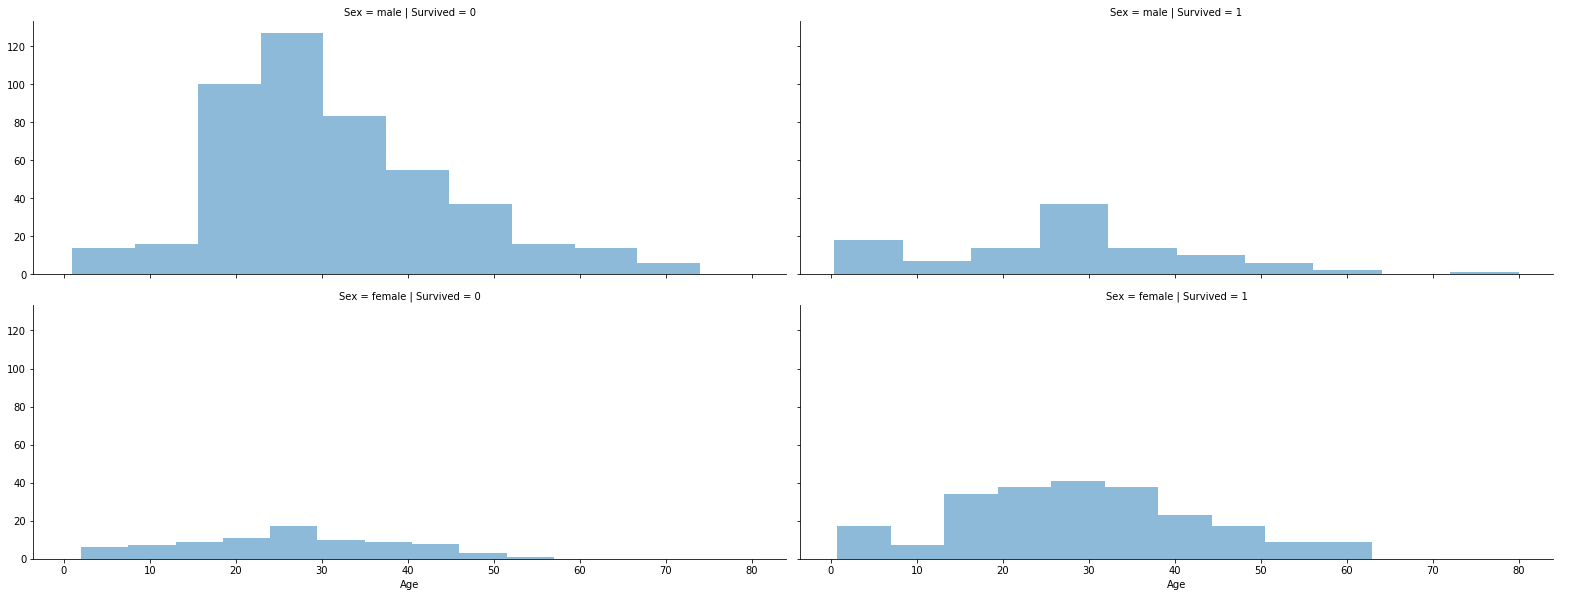

In [9]:
#so who survivide?
#survival = Survival 0 = No, 1 = Yes
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', height=4.2, aspect=2.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

In [10]:
print(train_df['Sex'].value_counts(normalize=True))
print('-------')
print(train_df['Sex'].value_counts(normalize=True).diff())
#30% more men

male      0.647587
female    0.352413
Name: Sex, dtype: float64
-------
male           NaN
female   -0.295174
Name: Sex, dtype: float64


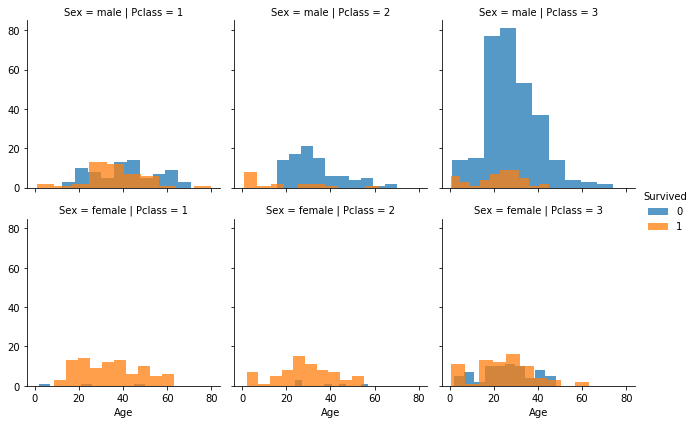

In [11]:
h = sns.FacetGrid(train_df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()
#so the 20's something 3rd class males were hit hardest, Jack was not the only one....

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text xticklabel objects>)

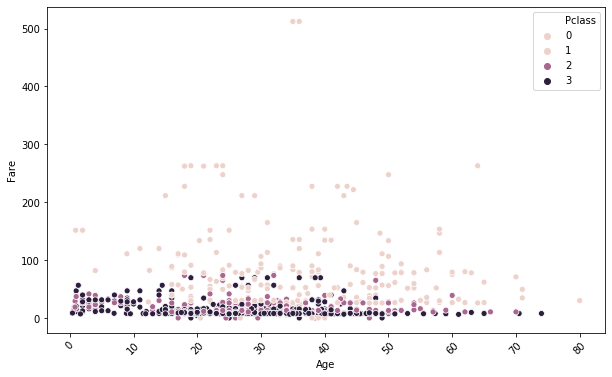

In [12]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x='Age', y='Fare', data=train_df, hue = 'Pclass')
plt.setp(ax.artists, alpha=0.8, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
#Kinda what I was expecting to see.

In [13]:
df_num_corr = df_num.corr()['Pclass']
df_corr = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("The {} correlated values with Class:\n{}".format(len(df_corr), df_corr))

The 6 correlated values with Class:
Pclass      1.000000
SibSp       0.083081
Parch       0.018443
Age        -0.304934
Survived   -0.338481
Fare       -0.549500
Name: Pclass, dtype: float64


In [ ]:
#The thing that I would look into more would be the ticket number. From a few of them you can tell
#that the first number is the Pclass and a few of the numbers repeat themselves too. Would be interesting to 
#find out if there was a particular system for the numbering. 

Websites that I looked at for a lot of my ideas.

https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial  

Not to mention the information from class, MSDS 422: Practical Machine Learning, Northwestern University. 

In [25]:
 dfs = train_df[['Pclass','Ticket']]#, 'Embark']]
dfs.head(13)

,Pclass,Ticket
0,3,A/5 21171
1,1,PC 17599
2,3,STON/O2. 3101282
3,1,113803
4,3,373450
5,3,330877
6,1,17463
7,3,349909
8,3,347742
9,2,237736
